<Figure size 1200x600 with 0 Axes>

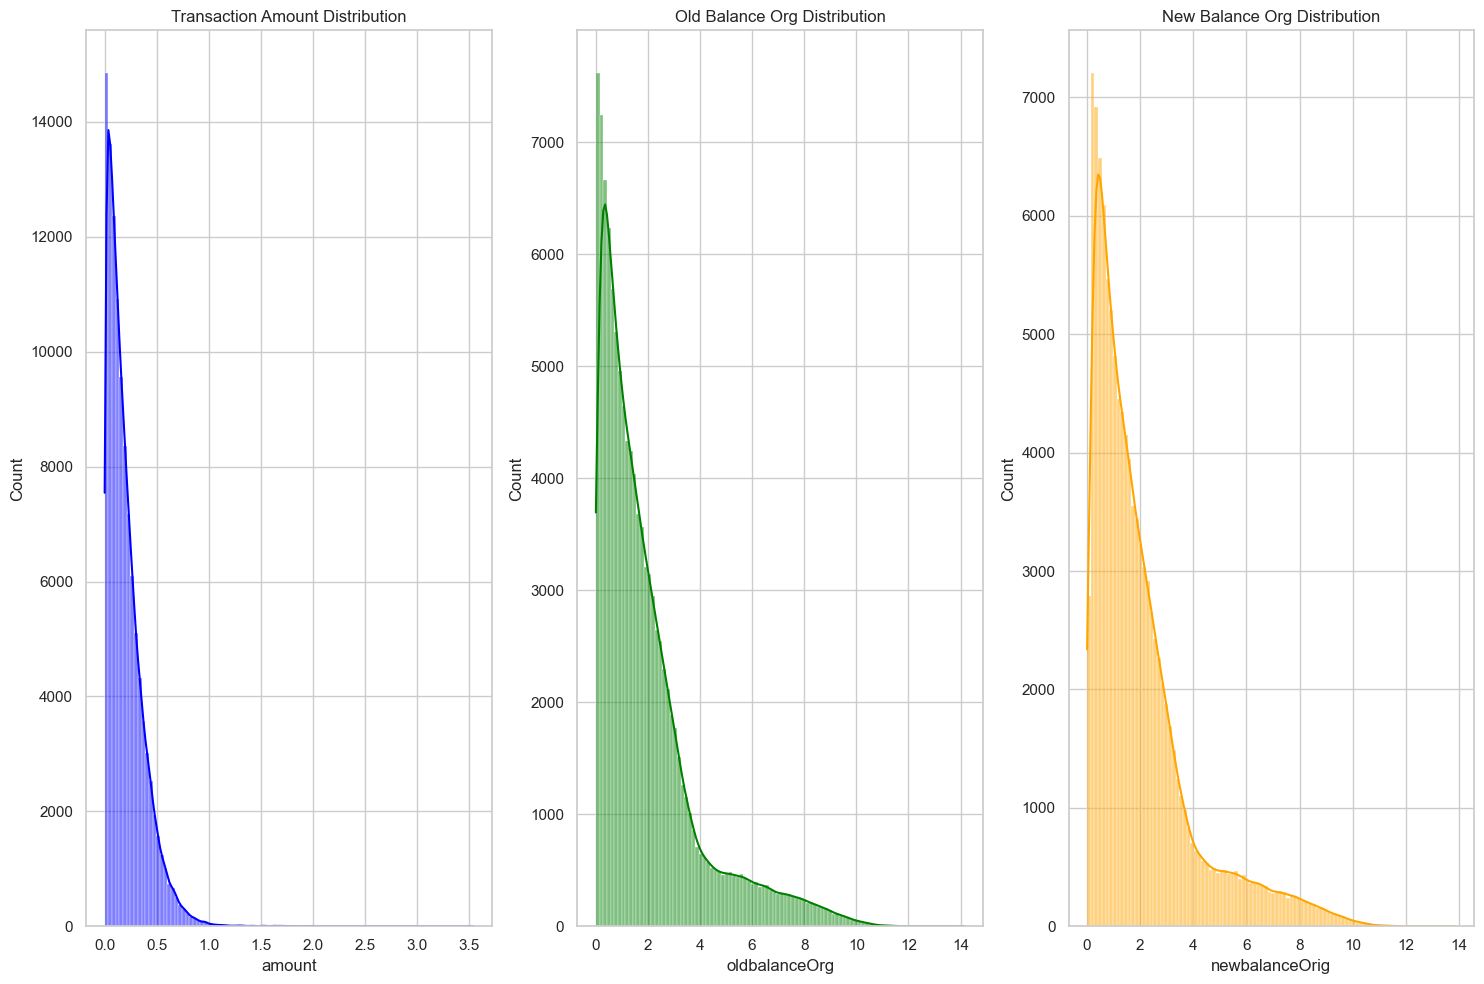

/var/folders/fh/sbbz12zd5svd_7hkv_5g34wr0000gp/T/ipykernel_66092/3576227140.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='pastel')


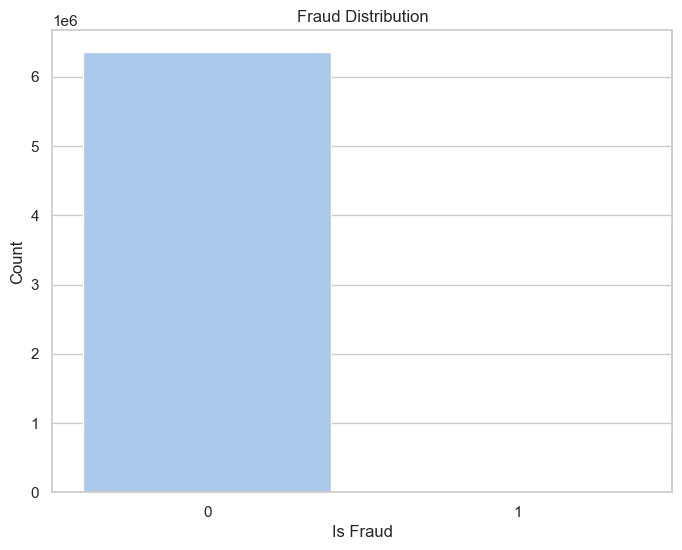

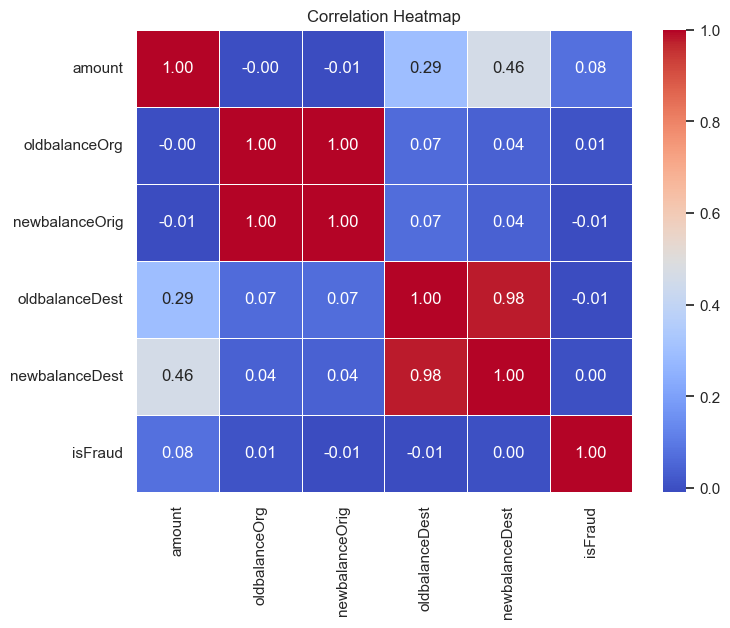

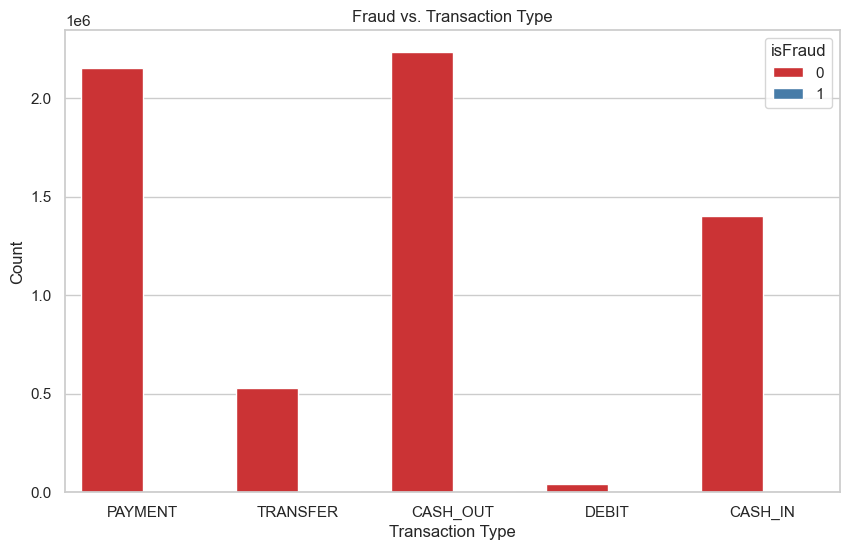

/var/folders/fh/sbbz12zd5svd_7hkv_5g34wr0000gp/T/ipykernel_66092/3576227140.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='amount', data=df, palette='muted')


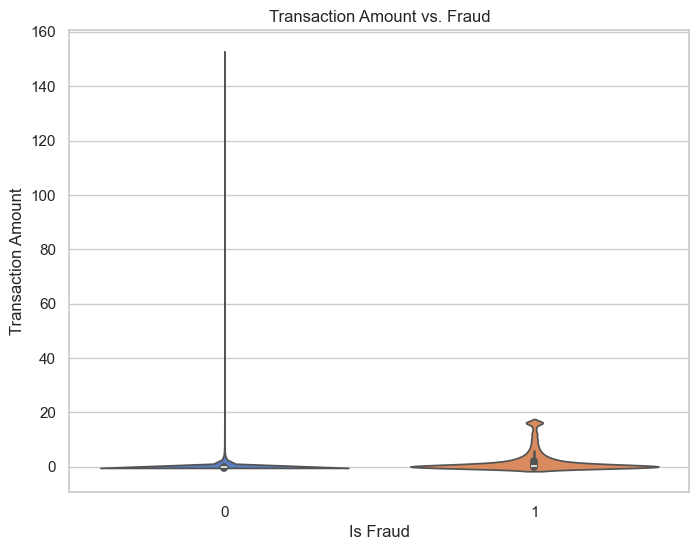

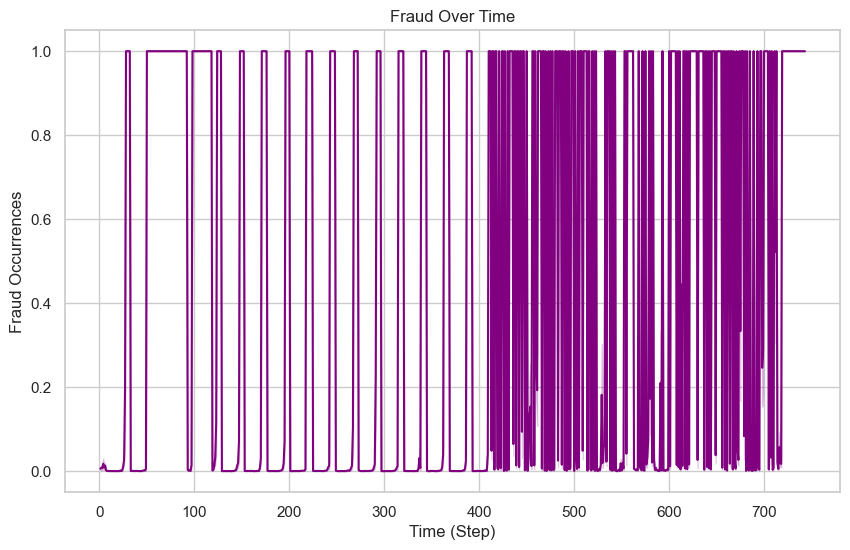

/var/folders/fh/sbbz12zd5svd_7hkv_5g34wr0000gp/T/ipykernel_66092/3576227140.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Blues')


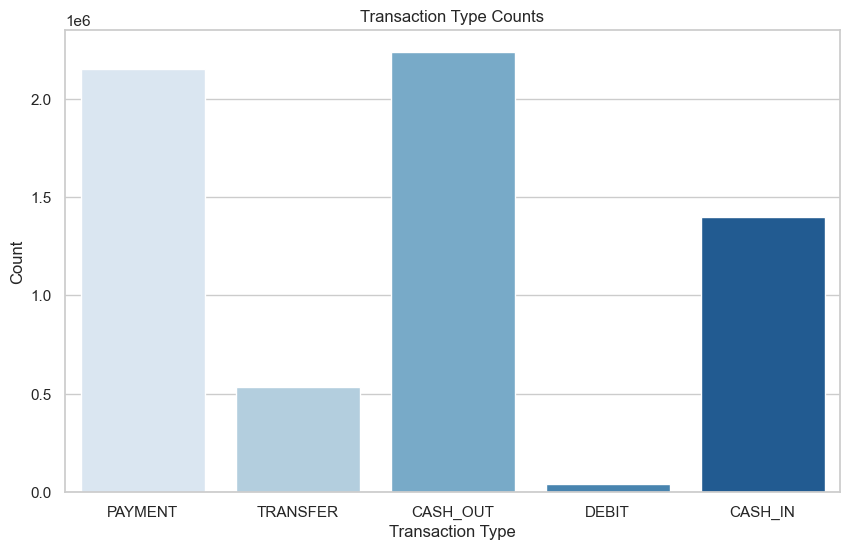

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('cleaned_transactions.csv')  # Make sure the path is correct

# Proceed with the EDA code after loading the dataset

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Distribution of Key Variables (e.g., `amount`, `oldbalanceOrg`, `newbalanceOrig`)
plt.figure(figsize=(12, 6))

# Remove transactions with 0 amount or balance
df_cleaned = df[df['amount'] > 0]
df_cleaned = df_cleaned[df_cleaned['oldbalanceOrg'] > 0]
df_cleaned = df_cleaned[df_cleaned['newbalanceOrig'] > 0]
df_cleaned = df_cleaned[df_cleaned['oldbalanceDest'] > 0]
df_cleaned = df_cleaned[df_cleaned['newbalanceDest'] > 0]

# Redo the plots with cleaned data

plt.figure(figsize=(15, 10))

# Amount Distribution
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['amount'], kde=True, color='blue', bins=100)
plt.title('Transaction Amount Distribution')

# Old Balance Org Distribution
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['oldbalanceOrg'], kde=True, color='green', bins=100)
plt.title('Old Balance Org Distribution')

# New Balance Org Distribution
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['newbalanceOrig'], kde=True, color='orange', bins=100)
plt.title('New Balance Org Distribution')

plt.tight_layout()
plt.show()


# 2. Fraud Distribution (target variable `isFraud`)
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df, palette='pastel')
plt.title('Fraud Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

# 3. Correlation Heatmap (for numeric columns)
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 4. Fraud vs. Transaction Type (Categorical analysis of `type` and `isFraud`)
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df, palette='Set1')
plt.title('Fraud vs. Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# 5. Transaction Amount vs. Fraud (Violin plot to check distribution of `amount` by `isFraud`)
plt.figure(figsize=(8, 6))
sns.violinplot(x='isFraud', y='amount', data=df, palette='muted')
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

# 6. Time Series Analysis (Fraud over time, based on the `step` column)
plt.figure(figsize=(10, 6))
sns.lineplot(x='step', y='isFraud', data=df, color='purple')
plt.title('Fraud Over Time')
plt.xlabel('Time (Step)')
plt.ylabel('Fraud Occurrences')
plt.show()

# 7. Transaction Counts by Type (Total counts for each transaction type)
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='Blues')
plt.title('Transaction Type Counts')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

